In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

T0 = (1 + 5 + 12) / 15
x0 = 50
a0 = 10 
dx = 0.1
Tf = 100
Xf = 100
dT1 = 0.01
dT2 = 0.005

In [2]:
def start():
  t0 = np.zeros(int(Xf / dx) + 1)
  f = lambda x: T0 * ((x - x0) / a0) ** 2 * np.exp(-((x - x0) / a0) ** 2)
  for i in range(int(Xf / dx) + 1):
    t0[i] = f(i / 10)  
  return t0


def alf(dt):
  return(dt / (dx ** 2))


def s(dt):
  return 1 / alf(dt)


def expl(t0, dt):
  t1 = np.zeros(int(Xf / dx) + 1)
  for i in range(1, int(Xf / dx)):
    t1[i] = t0[i] + alf(dt) * (t0[i + 1] - 2 * t0[i] + t0[i - 1]) 
  return t1


def impl(t0, dt):
  xy = np.zeros((2, int(Xf / dx) - 1))
  t1 = np.zeros(int(Xf / dx) + 1)

  for i in range(int(Xf / dx) - 2, 0, -1):
    xy[0][i - 1] = -1 / (-2 - s(dt) + xy[0][i])
    xy[1][i - 1] = (-s(dt) * t0[i] - xy[1][i]) / (-2 - s(dt) + xy[0][i])

  for i in range(1, int(Xf / dx) - 1):
    t1[i] = xy[0][i - 1] * t1[i - 1] + xy[1][i - 1]
  return t1


In [3]:
#step_t=0.01
Pp = [0, 10, 20, 30, 50, 100]
P = [Pi / 0.01 + 1 for Pi in Pp]
T1_e = []; T1_i = []
ex = start()
im = start()
T1_e.append(start()); T1_i.append(start())

for i in tqdm(range(1, int(Tf / dT1) + 1), mininterval = 1, position=0, leave=True):
  im_ex = im
  im = impl(im_ex, dT1)
  if i in P:
    T1_i.append(im)

Pp_bad = [0, 0.22, 0.25, 0.5, 3, 5]
P_bad = [Pi / dT1 + 1 for Pi in Pp_bad]
for i in tqdm(range(1, 504), mininterval = 1, position=0, leave=True):
  ex_ex = ex
  ex = expl(ex_ex, dT1)
  if i in P_bad:
    T1_e.append(ex) 


100%|██████████| 503/503 [00:00<00:00, 914.85it/s]


In [ ]:
# ex = start()
# T1_e.append(start());
# T1_e = []
# Pp_bad = [0, 0.22, 0.25, 0.5, 3, 5]
# P_bad = [Pi / 0.01 + 1 for Pi in Pp_bad]
# for i in tqdm(range(1, 504), mininterval = 1, position=0, leave=True):
#   ex_ex = ex
#   ex = expl(ex_ex, dT1)
#   if i in P_bad:
#     T1_e.append(ex) 

100%|██████████| 503/503 [00:00<00:00, 833.55it/s]


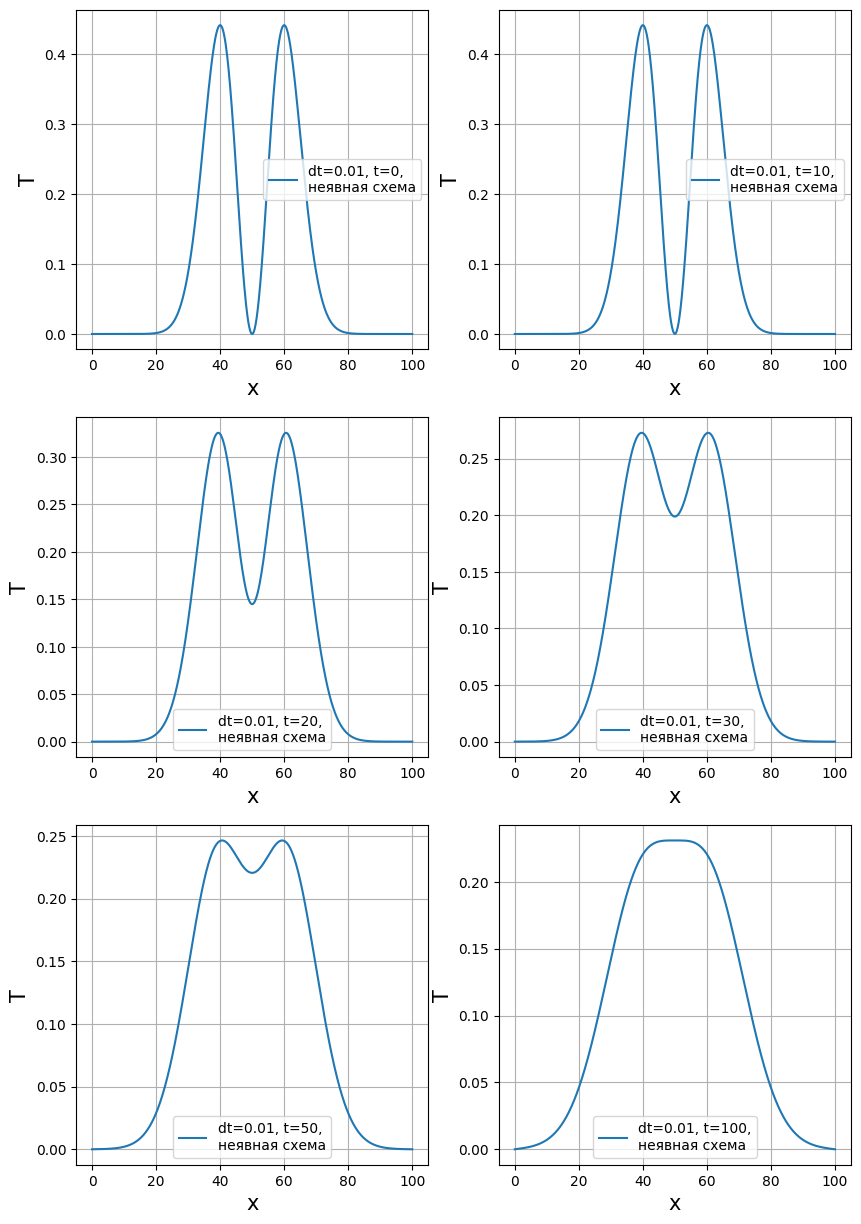

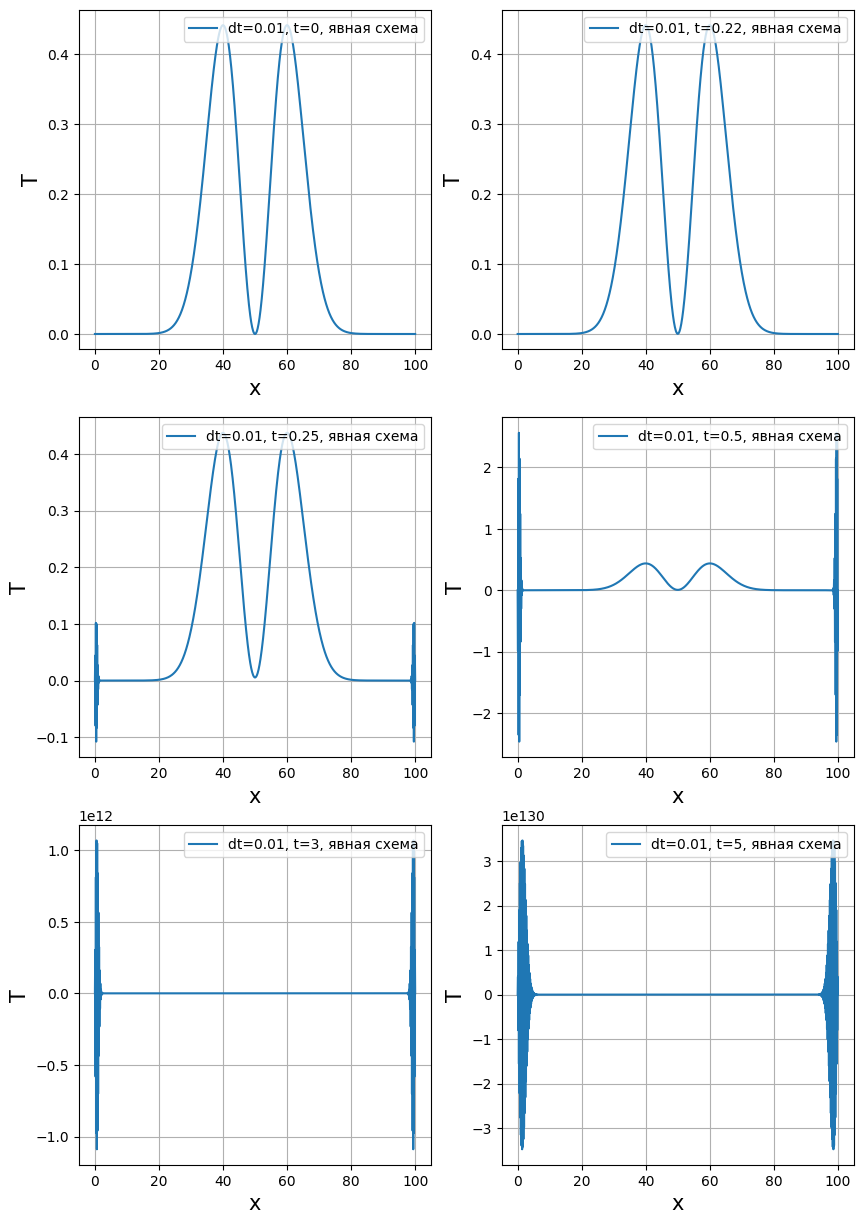

In [4]:
fig = plt.subplots(3, 2, figsize=(10, 15)) 
for i in range(len(P)):
  plt.subplot(3, 2, i+1)
  plt.plot(np.arange(0, 100 + dx, dx), T1_i[i], label = 'dt=0.01, t=%s,\nнеявная схема' % Pp[i])
  plt.grid(True)
  plt.xlabel('x', size = 15)
  plt.ylabel('T', size = 15)
  plt.legend() 
plt.savefig("1_i")

fig = plt.subplots(3, 2, figsize=(10, 15))  
for i in range(len(Pp_bad)):
  plt.subplot(3, 2, i+1)
  plt.plot(np.arange(0, 100 + dx, dx), T1_e[i], label = 'dt=0.01, t=%s, явная схема' % Pp_bad[i])
  plt.grid(True)
  plt.xlabel('x', size = 15)
  plt.ylabel('T', size = 15)
  plt.legend(loc = 'upper right') 
plt.savefig("1_e") 

In [5]:
#step_t=0.005
Rr = [0, 10, 20, 30, 50, 100]
R = [Ri / dT2 + 1 for Ri in Rr]
T2_e = []; T2_i = []
ex = start()
im = start()
T2_e.append(start()); T2_i.append(start())

for i in tqdm(range(1, int(Tf / dT2) + 1), mininterval = 1, position=0, leave=True):
  im_ex = im
  ex_ex = ex
  ex = expl(ex_ex, dT2)
  im = impl(im_ex, dT2)
  if i in R:
    T2_i.append(im)
    T2_e.append(ex)  

100%|██████████| 20000/20000 [01:48<00:00, 185.16it/s]


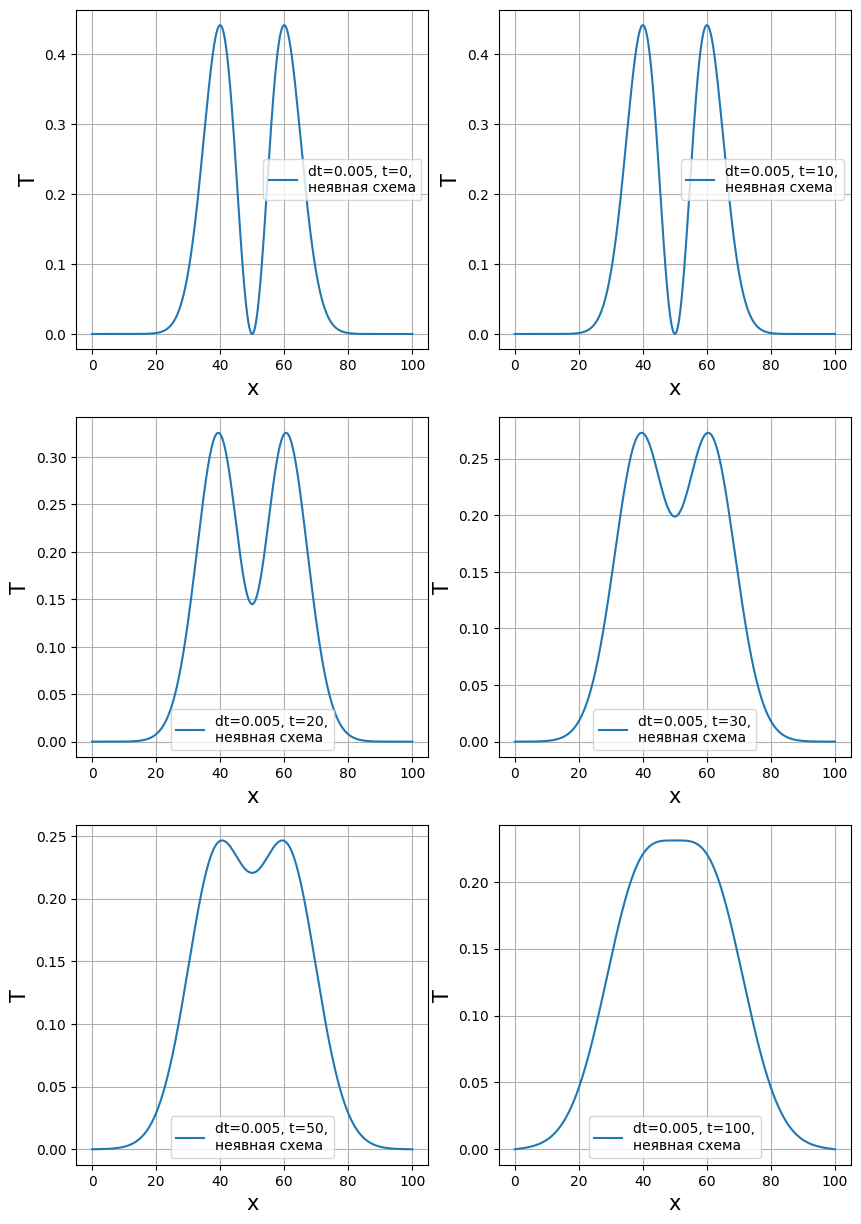

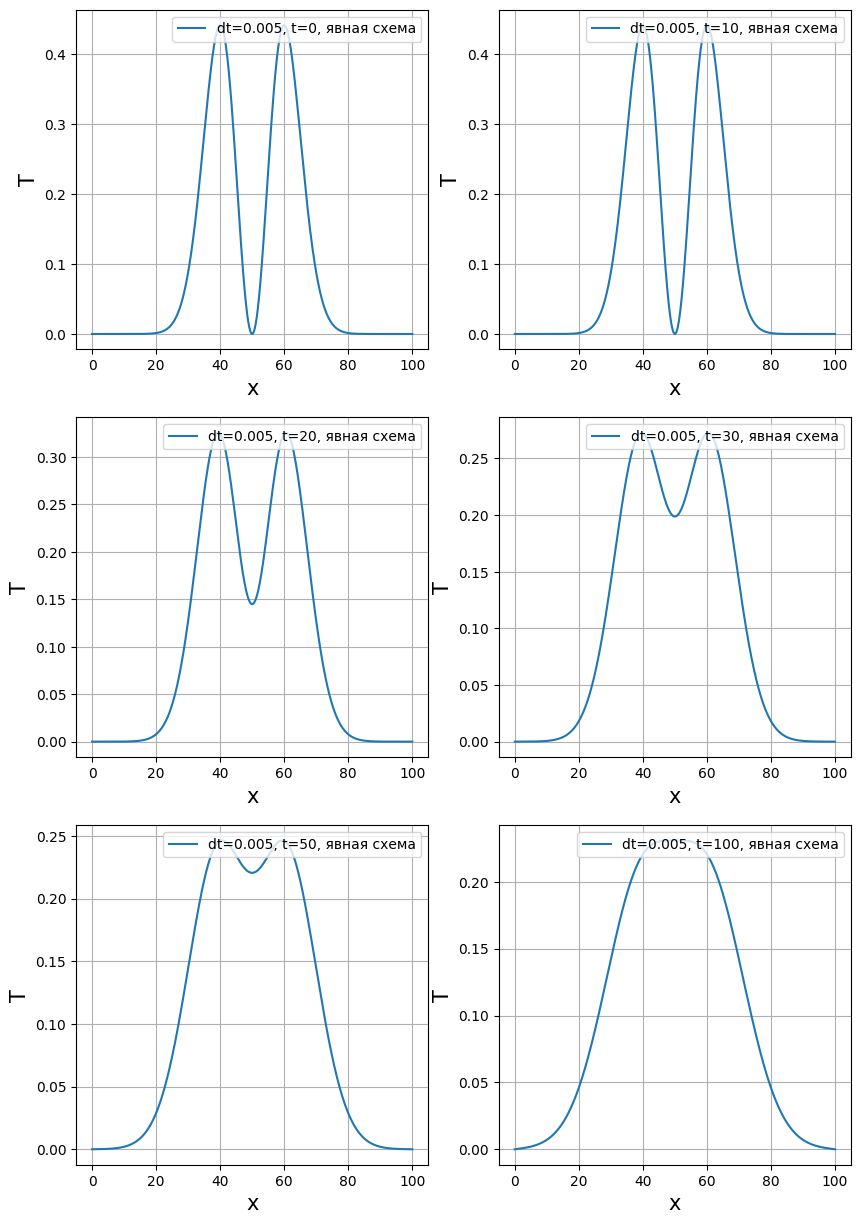

In [6]:
fig = plt.subplots(3, 2, figsize=(10, 15)) 
for i in range(len(R)):
  plt.subplot(3, 2, i+1)
  plt.plot(np.arange(0, 100 + dx, dx), T2_i[i], label = 'dt=0.005, t=%s,\nнеявная схема' % Rr[i])
  plt.grid(True)
  plt.xlabel('x', size = 15)
  plt.ylabel('T', size = 15)
  plt.legend() 
plt.savefig("2_i")

fig = plt.subplots(3, 2, figsize=(10, 15))  
for i in range(len(R)):
  plt.subplot(3, 2, i+1)
  plt.plot(np.arange(0, 100 + dx, dx), T2_e[i], label = 'dt=0.005, t=%s, явная схема' % Rr[i])
  plt.grid(True)
  plt.xlabel('x', size = 15)
  plt.ylabel('T', size = 15)
  plt.legend(loc = 'upper right') 
plt.savefig("2_e") 

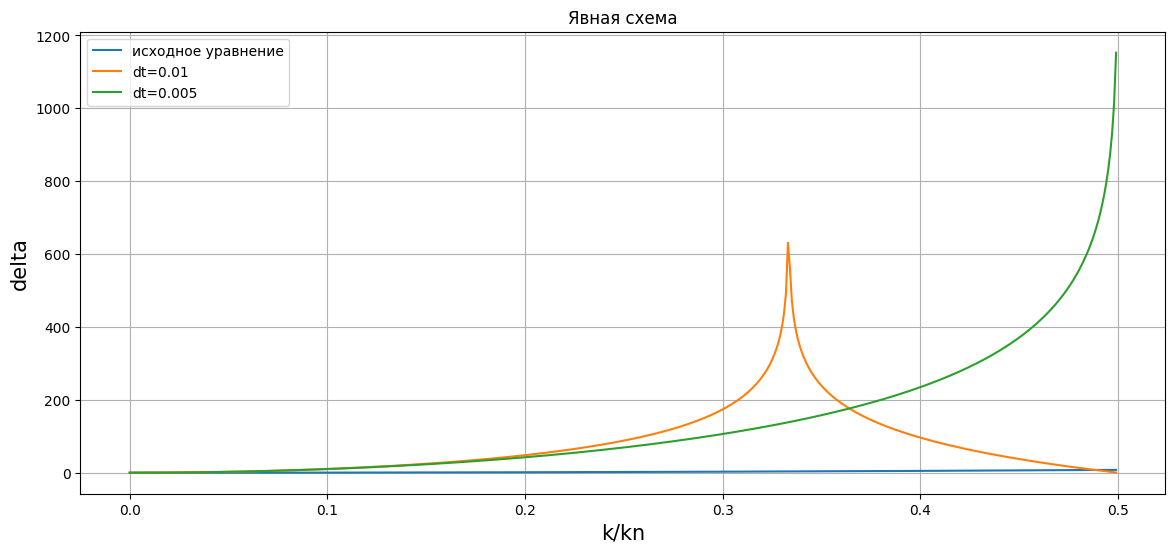

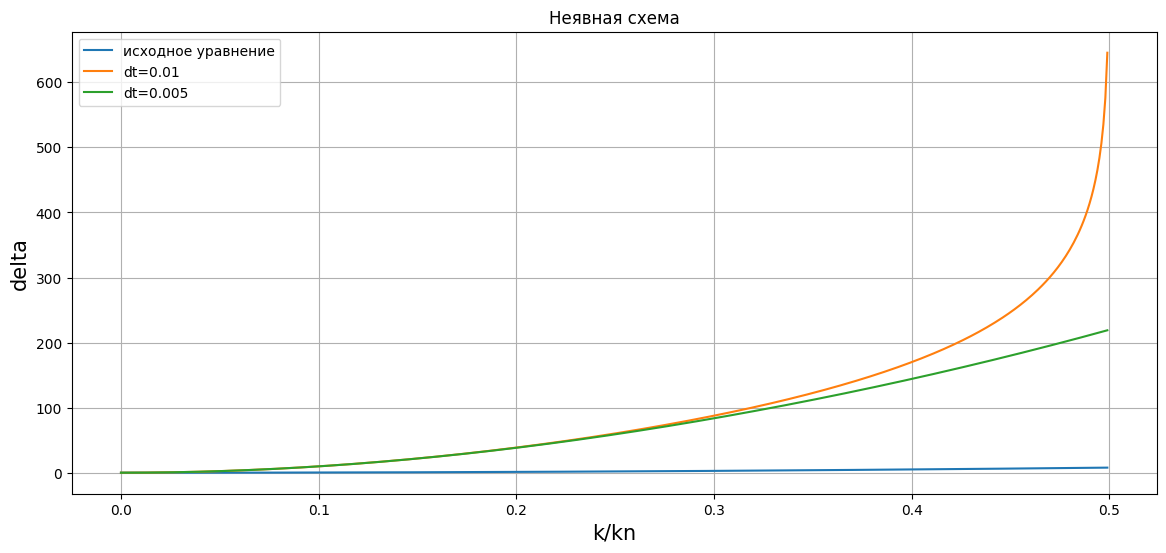

In [ ]:
#Диффузия
x = np.arange(0, 0.5, 0.001)
D = [xi ** 2 * np.pi / dx for xi in x]

de = lambda x, t: np.real(-np.log(complex(1 - 4 * t * (np.sin(np.pi * x / 2)) ** 2 / (dx) ** 2)) / t)
di = lambda x, t: np.real(np.log(complex((1 + 2 * t * (np.sin(np.pi * x / 2)) ** 2 / (dx) ** 2) / abs(1 - 2 * t * (np.sin(np.pi * x / 2)) ** 2 / (dx) ** 2))) / t)

De1 = [de(xi, dT1) for xi in x]
De2 = [de(xi, dT2) for xi in x]
Di1 = [di(xi, dT1) for xi in x]
Di2 = [di(xi, dT2) for xi in x]
labels = ['исходное уравнение', 'dt=0.01', 'dt=0.005']

plt.figure(figsize=(14,6))
for y, label in zip([D, De1, De2], labels):
  plt.plot(x, y, label = label)
plt.grid(True)
plt.legend()
plt.title('Явная схема')
plt.xlabel('k/kn', size = 15)
plt.ylabel('delta', size = 15)
plt.savefig("dt1")

plt.figure(figsize=(14,6))
for y, label in zip([D, Di1, Di2], labels):
  plt.plot(x, y, label = label)
plt.grid(True)
plt.title('Неявная схема')
plt.xlabel('k/kn', size = 15)
plt.ylabel('delta', size = 15)
plt.legend()
plt.savefig("dt2")